<a href="https://colab.research.google.com/github/raghavadevarajeurs/DeepLearning/blob/main/Assignment4/MNIST_classifier_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt 
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

## Data Load and Preview

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

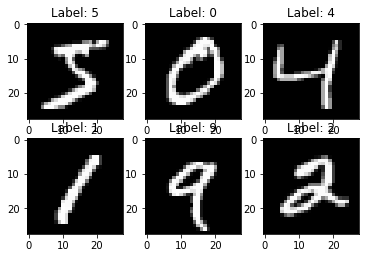

In [ ]:
plt.figure(figsize=[6,6])
for i in range(6):
  plt.subplot(3,3,i+1)
  plt.title("Label: %i"%y_train[i])
  plt.imshow(X_train[i].reshape([28,28]),cmap='gray')

## Normalizingi train and test data

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
print(X_train.shape)

(60000, 28, 28, 1)


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
print(y_train.shape)
print(y_test.shape[:10])

(60000,)
(10000,)


In [ ]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)
print(y_test.shape)

(10000,)


## Defining Keras sequential model

In [ ]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.5031 - accuracy: 0.8386
Epoch 2/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0980 - accuracy: 0.9724
Epoch 3/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0803 - accuracy: 0.9775
Epoch 4/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0593 - accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0551 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0462 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0449 - accuracy: 0.9878
Epoch 8/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0405 - accuracy: 0.9885
Epoch 9/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0337 - accuracy: 0.9905
Epoch 10/10
1875/1875 [==============================] 

## Plotting Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='MNIST Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

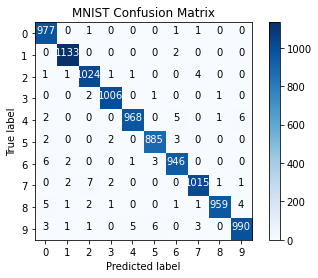

In [ ]:
# Generate predictions and fetch confusion matrix to plot
y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(np.argmax(Y_test, axis=1), y_pred)
plot_confusion_matrix(cm, list(range(0, 10)))

In [ ]:
def plot_validation(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9903

## Common Errors

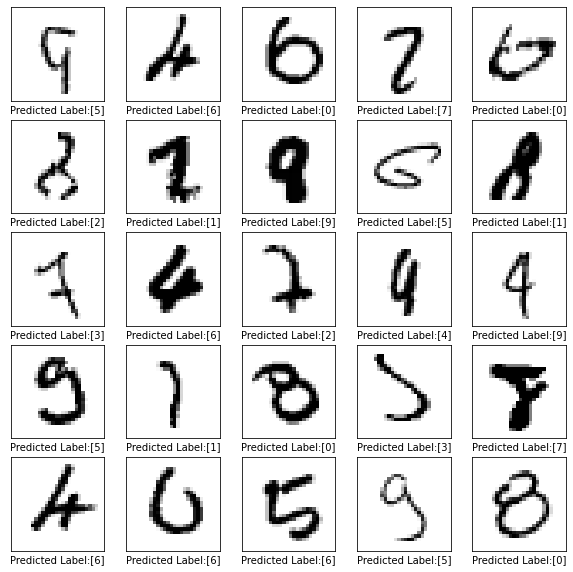

In [ ]:
errors_indices = []
for i in range(0, len(y_pred)):
  #print("y_pred = " + str(y_pred[i]))
  #print("test_lable = " + str(test_labels[i]))
  if(y_pred[i] != y_test[i]):
    errors_indices.append(i)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[errors_indices[i]].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel("Predicted Label:" + str([y_pred[errors_indices[i]]]))
plt.show()

## Augmenting the data

In [ ]:
def data_augmentation(x_train,y_train,augment_size=10000): 
        image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range = 0.05, 
            width_shift_range=0.05,
            height_shift_range=0.05,
            horizontal_flip=False,
            vertical_flip=False, 
            data_format="channels_last",
            zca_whitening=True)
        image_generator.fit(x_train, augment=True)       
        train_size=len(x_train)
        randidx = np.random.randint(train_size, size=augment_size)
        x_augmented = x_train[randidx].copy()
        y_augmented = y_train[randidx].copy()
        x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                    batch_size=augment_size, shuffle=False).next()[0]        
        x_train = np.concatenate((x_train, x_augmented))
        y_train = np.concatenate((y_train, y_augmented))
        train_size = x_train.shape[0]
        return x_train, y_train

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28,1))
X_train,y_train=data_augmentation(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


## Previewing Augmented data

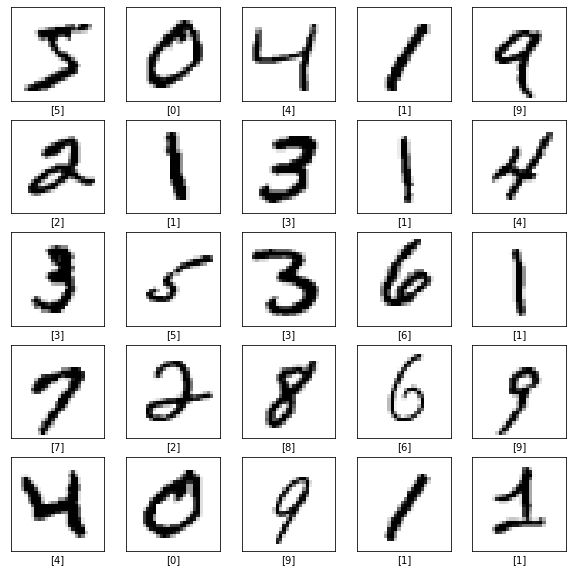

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel([y_train[i]])
plt.show()

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
print(X_train.shape)

(70000, 28, 28, 1)


In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)
print(y_test.shape)
print(X_train.shape)

(10000,)
(70000, 28, 28, 1)


## Model Execution

In [ ]:
history1 = model.fit(X_train,Y_train, epochs=15, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 91s 61ms/step - loss: 0.0523 - accuracy: 0.9860 - val_loss: 0.0131 - val_accuracy: 0.9958
Epoch 2/15
1500/1500 [==============================] - 92s 61ms/step - loss: 0.0319 - accuracy: 0.9911 - val_loss: 0.0100 - val_accuracy: 0.9967
Epoch 3/15
1500/1500 [==============================] - 91s 61ms/step - loss: 0.0257 - accuracy: 0.9926 - val_loss: 0.0139 - val_accuracy: 0.9964
Epoch 4/15
1500/1500 [==============================] - 91s 61ms/step - loss: 0.0274 - accuracy: 0.9922 - val_loss: 0.0138 - val_accuracy: 0.9960
Epoch 5/15
1500/1500 [==============================] - 91s 60ms/step - loss: 0.0261 - accuracy: 0.9927 - val_loss: 0.0121 - val_accuracy: 0.9964
Epoch 6/15
1500/1500 [==============================] - 90s 60ms/step - loss: 0.0226 - accuracy: 0.9936 - val_loss: 0.0136 - val_accuracy: 0.9964
Epoch 7/15
1500/1500 [==============================] - 92s 61ms/step - loss: 0.0232 - accuracy: 0.9938 - val_loss: 0.0136 -

In [ ]:
accuracy_score(y_test, y_pred)

0.9903

## Visualization and Confusion Matrix

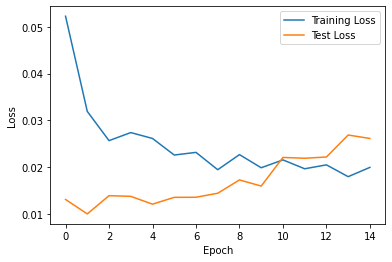

In [ ]:
plot_validation(history1)

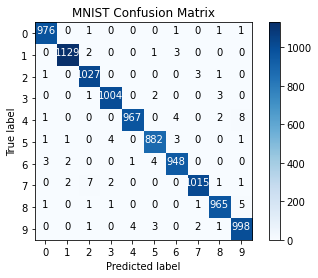

In [ ]:
# Generate predictions and fetch confusion matrix to plot
y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(np.argmax(Y_test, axis=1), y_pred)
plot_confusion_matrix(cm, list(range(0, 10)))